In [1]:
import torch
import matplotlib.pyplot as plt

from src.manifolds.deformed_sum_of_gaussian_pullback_manifold.quadratic_double_banana_pullback_manifold import QuadraticDoubleBananaPullbackManifold
# from src.riemannian_autoencoder.deformed_gaussian_riemannian_autoencoder import DeformedGaussianRiemannianAutoencoder

/Users/wdiepeveen/Documents/Postdoc/projects/1 - score-based Riemannian geometry/src/Score-based-Riemannian-geometry/.venv/lib/python3.8/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


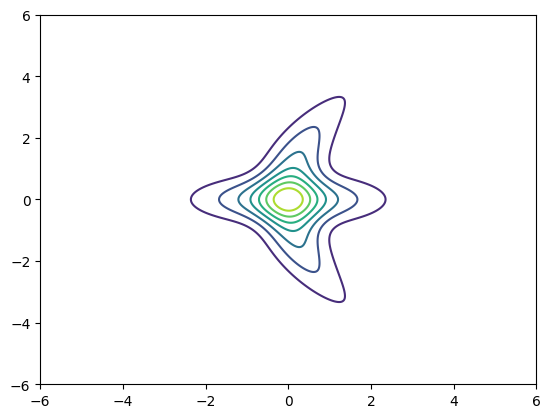

In [2]:
double_banana_manifold = QuadraticDoubleBananaPullbackManifold()

xx = torch.linspace(-6.0, 6.0, 500)
yy = torch.linspace(-6.0, 6.0, 500)
x_grid, y_grid = torch.meshgrid(xx, yy)

xy_grid = torch.zeros((*x_grid.shape,2))
xy_grid[:,:,0] = x_grid
xy_grid[:,:,1] = y_grid

density_banana = torch.exp(double_banana_manifold.dsg.log_density(xy_grid.reshape(-1,2)).reshape(x_grid.shape))
plt.contour(x_grid, y_grid, density_banana)
plt.show()

In [3]:
# special points
x0 = torch.tensor([2.,4.])
x1 = torch.tensor([2.,-4.])
x2 = torch.tensor([2.,0.])

p = 10

In [4]:
# # test barycentre # TODO this might be very hard to compute...
# x=torch.zeros((3,2))
# x[0] = x0
# x[1] = x1
# x[2] = x2

# barycentre = double_banana_manifold.barycentre(x).detach().numpy()

# plt.contour(x_grid, y_grid, density_banana)
# plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
# plt.scatter(barycentre[0], barycentre[1], color="orange")
# plt.savefig("results/quadratic_double_banana/barycentre.eps")
# plt.show()

In [5]:
# test inner
X = torch.eye(2)

inner_0 = double_banana_manifold.inner(torch.zeros(2)[None], X[None], X[None])
inner_x0 = double_banana_manifold.inner(x0[None], X[None], X[None])
inner_x2 = double_banana_manifold.inner(x2[None], X[None], X[None])

print(inner_0)
print(inner_x0)
print(inner_x2)

tensor([[[8.1250, 0.0000],
         [0.0000, 8.0312]]])
tensor([[[ 16.0000, -14.2222],
         [-14.2222,  12.7045]]])
tensor([[[ 0.2643,  0.0000],
         [ 0.0000, 15.9855]]])


Epoch 0, Loss 108.27095794677734
Epoch 100, Loss 63.65703582763672
Epoch 200, Loss 56.622802734375
Epoch 300, Loss 52.683956146240234
Epoch 400, Loss 52.207176208496094
Epoch 500, Loss 52.20716857910156
Epoch 600, Loss 52.20717239379883
Epoch 700, Loss 52.20716857910156
Epoch 800, Loss 52.20718765258789
Epoch 900, Loss 52.20717239379883
Epoch 0, Loss 120.546630859375
Epoch 100, Loss 37.524269104003906
Epoch 200, Loss 33.18714904785156
Epoch 300, Loss 31.033010482788086
Epoch 400, Loss 29.095182418823242
Epoch 500, Loss 27.279956817626953
Epoch 600, Loss 26.68828582763672
Epoch 700, Loss 26.624183654785156
Epoch 800, Loss 26.622913360595703
Epoch 900, Loss 26.622900009155273


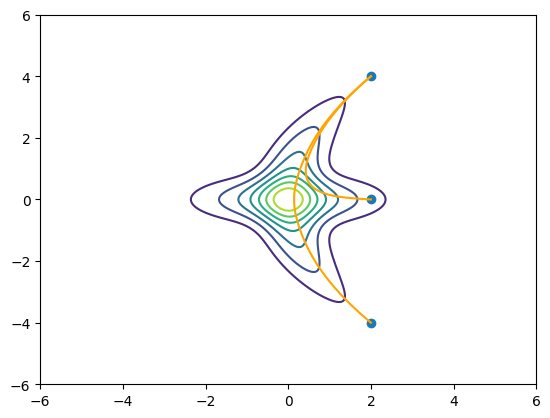

In [6]:
# test interpolation
t = torch.linspace(0.,1.,100)

geodesic_x0_x1 = double_banana_manifold.geodesic(x0,x1,t,p=p).detach().numpy()
geodesic_x0_x2 = double_banana_manifold.geodesic(x0,x2,t,p=p).detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.plot(geodesic_x0_x1[:,0], geodesic_x0_x1[:,1], color="orange")
plt.plot(geodesic_x0_x2[:,0], geodesic_x0_x2[:,1], color="orange")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_double_banana/geodesic.eps")
plt.show()

# TODO make second plot with decision boundaries so that we can clearly see that we really only have weird geodesics on the boundary region

tensor([[  0.0000,  -7.4085],
        [  0.0000,  -9.3889],
        [  0.0000, -11.6923],
        [  0.0000, -14.2851],
        [  0.0000, -17.0993],
        [  0.0000, -20.0340],
        [  0.0000, -22.9659],
        [  0.0000, -25.7651],
        [  0.0000, -28.3130],
        [  0.0000, -30.5172],
        [  0.0000, -32.3195],
        [  0.0000, -33.6963],
        [  0.0000, -34.6531],
        [  0.0000, -35.2162],
        [  0.0000, -35.4240],
        [  0.0000, -35.3200],
        [  0.0000, -34.9481],
        [  0.0000, -34.3489],
        [  0.0000, -33.5590],
        [  0.0000, -32.6102],
        [  0.0000, -31.5301],
        [  0.0000, -30.3426],
        [  0.0000, -29.0686],
        [  0.0000, -27.7268],
        [  0.0000, -26.3342],
        [  0.0000, -24.9065],
        [  0.0000, -23.4583],
        [  0.0000, -22.0034],
        [  0.0000, -20.5544],
        [  0.0000, -19.1231],
        [  0.0000, -17.7199],
        [  0.0000, -16.3540],
        [  0.0000, -15.0330],
        [ 

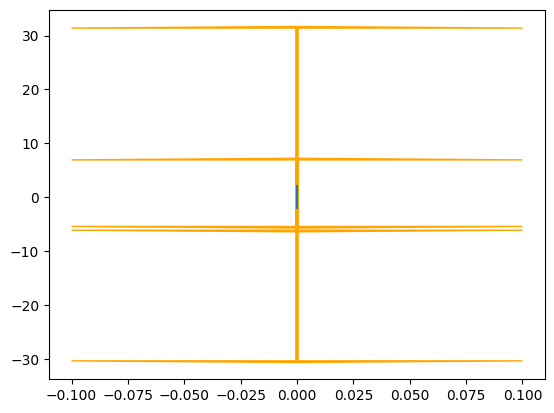

In [7]:
# debug Christoffel operator
t = torch.linspace(0.,1.,100)
geo = (1 - t[:,None]) * torch.tensor([0.,2.])[None] + t[:,None] * torch.tensor([0.,-2.])[None]
dot_geo = (torch.tensor([0.,-2.])[None] - torch.tensor([0.,2.])[None]) * torch.ones(100)[:,None]
christoffels = double_banana_manifold.manifold.christoffel_operator(geo,dot_geo,dot_geo)
print(christoffels)

plt.plot(geo[:,0], geo[:,1])
for i in range(5):
    plt.arrow(geo[20 * i,0], geo[20 * i,1], christoffels[20 * i,0], christoffels[20 * i,1], head_width=0.2, color="orange")
plt.show()

Epoch 0, Loss 108.27095794677734
Epoch 100, Loss 63.65703582763672
Epoch 200, Loss 56.622802734375
Epoch 300, Loss 52.683956146240234
Epoch 400, Loss 52.207176208496094
Epoch 500, Loss 52.20716857910156
Epoch 600, Loss 52.20717239379883
Epoch 700, Loss 52.20716857910156
Epoch 800, Loss 52.20718765258789
Epoch 900, Loss 52.20717239379883
Epoch 0, Loss 120.546630859375
Epoch 100, Loss 37.524269104003906
Epoch 200, Loss 33.18714904785156
Epoch 300, Loss 31.033010482788086
Epoch 400, Loss 29.095182418823242
Epoch 500, Loss 27.279956817626953
Epoch 600, Loss 26.68828582763672
Epoch 700, Loss 26.624183654785156
Epoch 800, Loss 26.622913360595703
Epoch 900, Loss 26.622900009155273


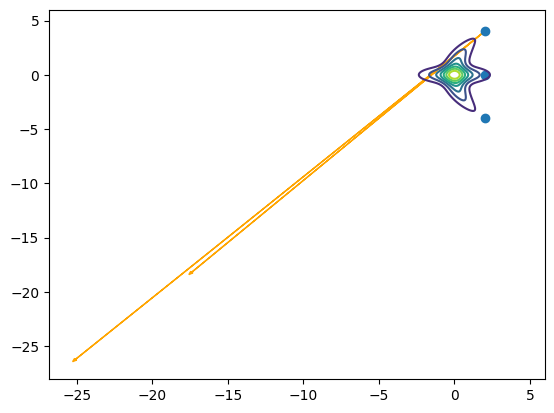

In [8]:
# test logarithmic mapping

logarithmic_x0_x1 = double_banana_manifold.log(x0,x1[None], p=p)[0].detach().numpy()
logarithmic_x0_x2 = double_banana_manifold.log(x0,x2[None], p=p)[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2, color="orange")
plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2, color="orange")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_double_banana/logarithmic.eps")
plt.show()

# ps = [10,20,30,40,50,60,70,80,90,100]
# error_to_ref = torch.zeros(len(ps), 2)
# for i, p in enumerate(ps):
#     logarithmic_x0_x1_p = double_banana_manifold.log(x0,x1[None], p=p)[0].detach().numpy()
#     logarithmic_x0_x2_p = double_banana_manifold.log(x0,x2[None], p=p)[0].detach().numpy()

#     error_to_ref[i,0] = torch.norm(torch.tensor(logarithmic_x0_x1_p) - torch.tensor(logarithmic_x0_x1))
#     error_to_ref[i,1] = torch.norm(torch.tensor(logarithmic_x0_x2_p) - torch.tensor(logarithmic_x0_x2))

#     plt.contour(x_grid, y_grid, density_banana)
#     plt.arrow(x0[0], x0[1], logarithmic_x0_x1_p[0], logarithmic_x0_x1_p[1], head_width=0.2, color="orange")
#     plt.arrow(x0[0], x0[1], logarithmic_x0_x2_p[0], logarithmic_x0_x2_p[1], head_width=0.2, color="orange")
#     plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
#     plt.savefig(f"results/quadratic_double_banana/logarithmic_p{p}.eps")
#     plt.show()


# plt.plot(ps, error_to_ref)
# plt.savefig("results/quadratic_double_banana/logarithmic_stability.eps")
# plt.show()

t = 0
tensor([[0.2222, 3.9970]])
tensor([[ -0.2409, -30.2049]])
t = 1
tensor([[0.2222, 3.9940]])
tensor([[ -0.2410, -30.2050]])
t = 2
tensor([[0.2221, 3.9909]])
tensor([[ -0.2411, -30.2051]])
t = 3
tensor([[0.2221, 3.9879]])
tensor([[ -0.2412, -30.2052]])
t = 4
tensor([[0.2221, 3.9849]])
tensor([[ -0.2413, -30.2052]])
t = 5
tensor([[0.2221, 3.9819]])
tensor([[ -0.2414, -30.2053]])
t = 6
tensor([[0.2221, 3.9789]])
tensor([[ -0.2415, -30.2054]])
t = 7
tensor([[0.2220, 3.9758]])
tensor([[ -0.2416, -30.2055]])
t = 8
tensor([[0.2220, 3.9728]])
tensor([[ -0.2417, -30.2056]])
t = 9
tensor([[0.2220, 3.9698]])
tensor([[ -0.2418, -30.2057]])
t = 10
tensor([[0.2220, 3.9668]])
tensor([[ -0.2419, -30.2058]])
t = 11
tensor([[0.2219, 3.9638]])
tensor([[ -0.2420, -30.2059]])
t = 12
tensor([[0.2219, 3.9607]])
tensor([[ -0.2421, -30.2060]])
t = 13
tensor([[0.2219, 3.9577]])
tensor([[ -0.2422, -30.2061]])
t = 14
tensor([[0.2219, 3.9547]])
tensor([[ -0.2423, -30.2062]])
t = 15
tensor([[0.2218, 3.9517]])
t

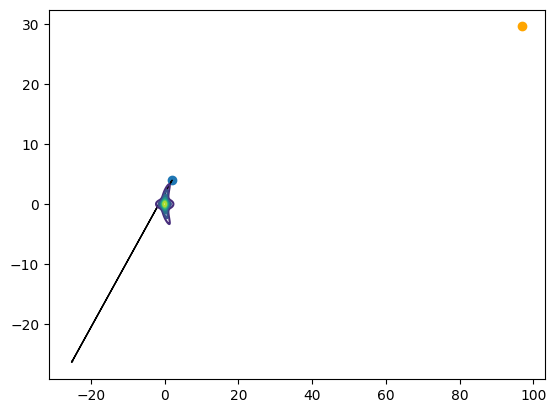

The error between exp_x0(log_x0 (x1)) and x1 is 100.82758331298828


In [9]:
# test exponential mapping
exponential_to_x1, iterates = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x1)[None])[0].detach().numpy()
# exponential_to_x2 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x2)[None])[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(x0[0], x0[1])
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2)
# plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2)
plt.scatter(exponential_to_x1[0], exponential_to_x1[1], color="orange")
plt.plot(iterates[:,0], iterates[:,1])
# plt.scatter(exponential_to_x2[0], exponential_to_x2[1], color="orange")
plt.savefig("results/quadratic_double_banana/exponential.eps")
plt.show()
print(f"The error between exp_x0(log_x0 (x1)) and x1 is {torch.norm(torch.tensor(exponential_to_x1) - x1)}")
# print(f"The error between exp_x0(log_x0 (x2)) and x2 is {torch.norm(torch.tensor(exponential_to_x2) - x2)}")

In [10]:
# test distance
l2_distance = torch.norm(x0 - x1)
distance = banana_manifold.distance(x0[None,None], x1[None,None])[0,0,0]
print(l2_distance)
print(distance)

NameError: name 'banana_manifold' is not defined

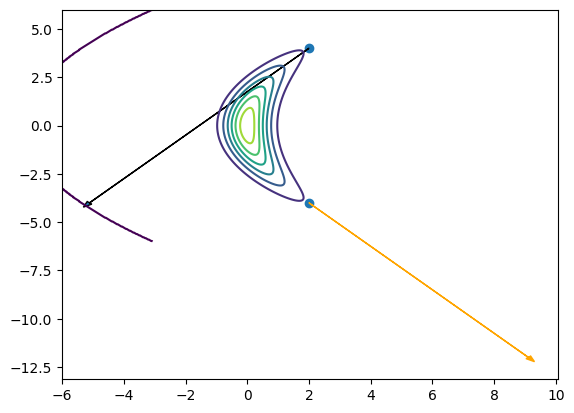

In [ ]:
# test parallel transport
parallel_transport = banana_manifold.parallel_transport(x0, logarithmic[None], x1)[0]

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.arrow(x0[0], x0[1], logarithmic[0], logarithmic[1], head_width=0.2)
plt.arrow(x1[0], x1[1], parallel_transport[0], parallel_transport[1], head_width=0.2, color="orange")
plt.savefig("results/quadratic_double_banana/parallel-transport.eps")
plt.show()


tensor([4.0000, 0.2500])
constructed a Riemannian autoencoder with d_eps = 1 and eps = 0.05882352963089943


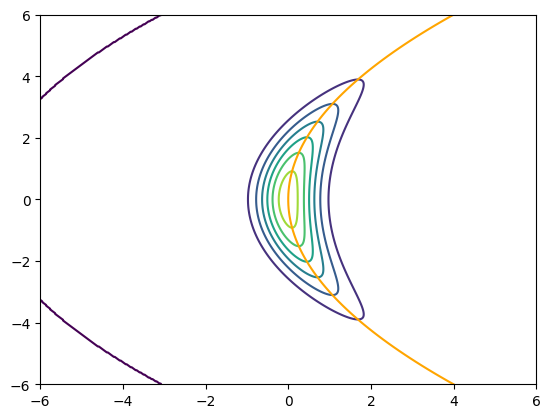

In [ ]:
# Riemannian autoencoder
epsilon = 0.1
banana_rae = DeformedGaussianRiemannianAutoencoder(banana_manifold, epsilon)

p = torch.linspace(-6, 6, 100)[:,None]
rae_decode_p = banana_rae.decode(p)

plt.contour(x_grid, y_grid, density_banana)
plt.plot(rae_decode_p[:,0], rae_decode_p[:,1], color="orange")
plt.savefig("results/quadratic_double_banana/rae_manifold.eps")
plt.show()